# Data Exploration

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from scipy import stats
import datetime 
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')
from data_preProcessing import data_preProcessing_script
from data_cleaner import DataCleaner

In [4]:
# loading the dataset
store_data = pd.read_csv('../data/store.csv')
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [5]:
# loading the joined dataset
train_store = pd.read_csv('../data/train_store.csv')
test_store = pd.read_csv('../data/test_store.csv')

## Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [10]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
from data_exploration import exploration

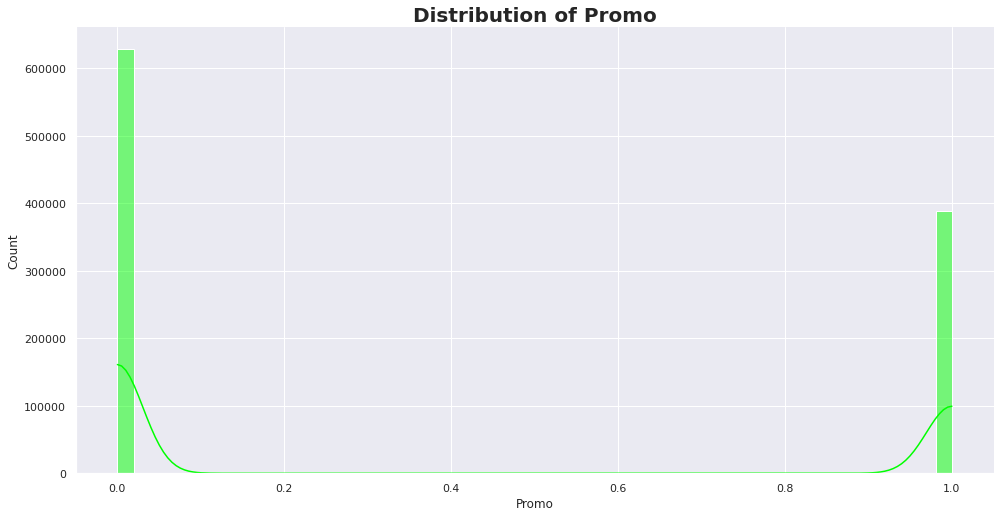

In [12]:
exploration.plot_hist(train_data, 'Promo', 'lime')

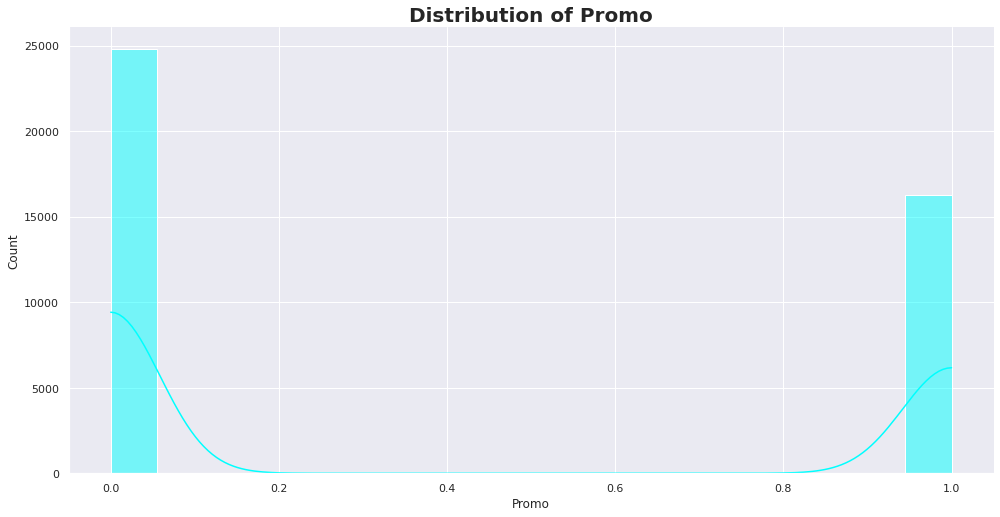

In [13]:
exploration.plot_hist(test_data, 'Promo', 'cyan')

In [14]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [16]:
# promo and sales 
sales_promo = train_data.groupby('Promo')["Sales"].sum()

In [19]:
promo_sale= pd.DataFrame({'Promo':sales_promo.index, 'sales_sum':sales_promo.values})
promo_sale.head()

,Promo,sales_sum
0,0,2771974337
1,1,3101206286


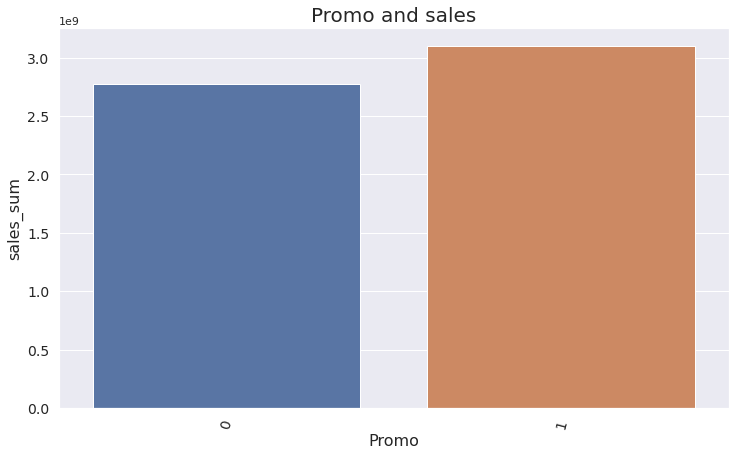

In [20]:
exploration.plot_bar(promo_sale, 'Promo', 'sales_sum', 'Promo and sales', 'Promo', 'sales_sum')

In [22]:
customers_promo = train_data.groupby('Promo')["Customers"].sum()

In [23]:
promo_customers= pd.DataFrame({'Promo':customers_promo.index, 'Customers':customers_promo.values})
promo_customers.head()

,Promo,Customers
0,0,325777807
1,1,318263948


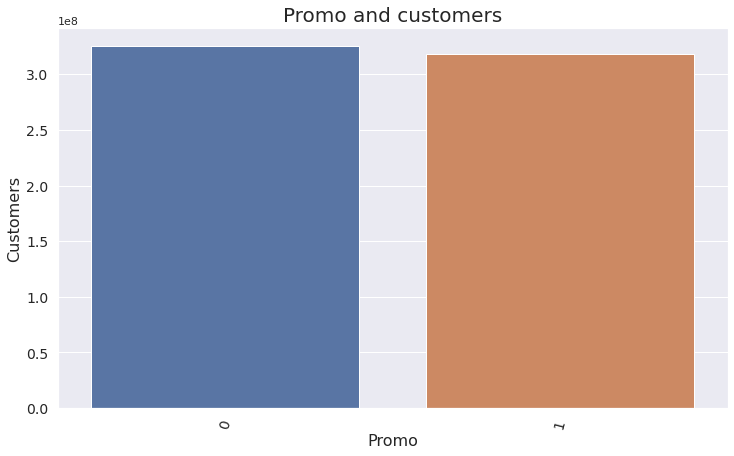

In [25]:
exploration.plot_bar(promo_customers, 'Promo', 'Customers', 'Promo and customers', 'Promo', 'Customers')

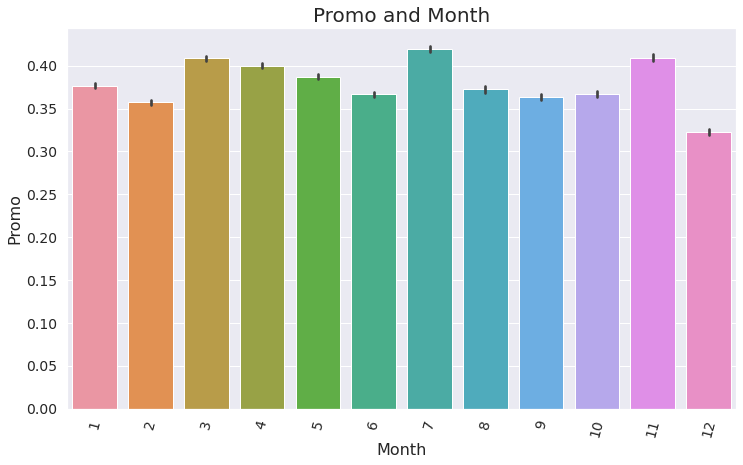

In [44]:
exploration.plot_bar(train_store, 'Month', 'Promo', 'Promo and Month', 'Month', 'Promo')

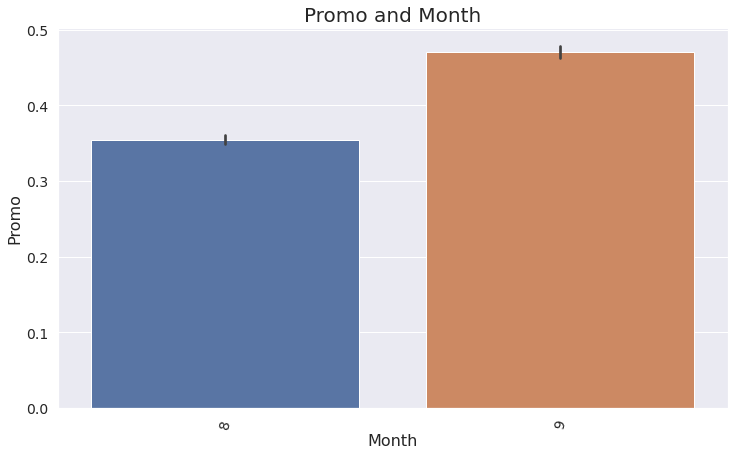

In [45]:
exploration.plot_bar(test_store, 'Month', 'Promo', 'Promo and Month', 'Month', 'Promo')

## Check & compare sales behavior before, during and after holidays

## Find out any seasonal (Christmas, Easter etc) purchase behaviours,

## What can you say about the correlation between sales and number of customers?

## How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

## Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

## Trends of customer behavior during store open and closing times

## Which stores are opened on all weekdays? How does that affect their sales on weekends? 

## Check how the assortment type affects sales

## How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?


## How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance
